# **Cohort analysis**

Cohort analysis involves dividing users into distinct groups, or cohorts, based on certain criteria. In this case study, these cohorts are defined by the time of user acquisition. By grouping users together based on time of acquisition, we can study how different cohorts behave in terms of engagement and retention.

For example, you might create cohorts based on the month users first signed up for your service. You can then track how each cohort's activity, such as their conversion rate or lifetime value, evolves over time. This approach allows you to identify trends, anomalies, and areas where you may need to make adjustments to improve user retention and satisfaction.

**Retention Rate Time-Based Cohort Analysis:**

Retention rate time-based cohort analysis is a specialized form of cohort analysis that focuses on the retention of users over multiple time periods.

To perform retention rate time-based cohort analysis, you would typically:

- Create cohorts based on user acquisition dates.

- Measure the percentage of users from each cohort who continue to engage with your product or service over time (e.g., after 1 month, 3 months, etc.).

- Analyze how retention rates vary across different cohorts and time periods, enabling you to identify trends and make data-driven decisions.

This analysis can reveal whether certain cohorts have better or worse retention rates, helping the business understand the factors contributing to user retention or attrition. It can also assist in optimizing marketing, product development, and customer support strategies.

# Import libraries

In [156]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from operator import attrgetter
from matplotlib.ticker import FuncFormatter

# Load and prepare dataset

In [157]:
# Load dataset

df = pd.read_csv('../data/Dataset_ecommerce.csv')
df.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda


In [158]:
df.describe(include ="all")

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
count,541909,541909,406829.000000,541909,541909,541909.000000,541909.000000,541909
unique,25900,23260,NaN,9000,10,NaN,NaN,28
top,573585,2011-10-31 14:41:00,NaN,SC2014,Sports Equipment,NaN,NaN,Cote d'Ivoire
freq,1114,1114,NaN,96,54765,NaN,NaN,19651
mean,NaN,NaN,15287.690570,NaN,NaN,50.534748,50.476354,NaN
std,NaN,NaN,1713.600303,NaN,NaN,28.849367,28.564775,NaN
min,NaN,NaN,12346.000000,NaN,NaN,1.000000,1.000000,NaN
25%,NaN,NaN,13953.000000,NaN,NaN,26.000000,25.750000,NaN
50%,NaN,NaN,15152.000000,NaN,NaN,51.000000,50.430000,NaN
75%,NaN,NaN,16791.000000,NaN,NaN,76.000000,75.180000,NaN


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   InvoiceDate  541909 non-null  object 
 2   CustomerID   406829 non-null  float64
 3   StockCode    541909 non-null  object 
 4   Description  541909 non-null  object 
 5   Quantity     541909 non-null  int64  
 6   UnitPrice    541909 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [160]:
df.isnull().sum()

InvoiceNo           0
InvoiceDate         0
CustomerID     135080
StockCode           0
Description         0
Quantity            0
UnitPrice           0
Country             0
dtype: int64

In [161]:
# Clean nulls (Drop missing column)

df.dropna(inplace = True)

#we can only track the activities of customers that are known (those with customerID)

In [162]:
# Format InvoiceDate

df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [163]:
# Create TotalPrice

df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [164]:
# Initial inspection

print(f'{df.info()}\n')
print(f'\n{df.describe()}\n')
print(f'\n{df.head()}')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   InvoiceDate  406829 non-null  datetime64[ns]
 2   CustomerID   406829 non-null  float64       
 3   StockCode    406829 non-null  object        
 4   Description  406829 non-null  object        
 5   Quantity     406829 non-null  int64         
 6   UnitPrice    406829 non-null  float64       
 7   Country      406829 non-null  object        
 8   TotalPrice   406829 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 31.0+ MB
None


          CustomerID       Quantity      UnitPrice     TotalPrice
count  406829.000000  406829.000000  406829.000000  406829.000000
mean    15287.690570      50.478471      50.477654    2550.053514
std      1713.600303      28.872921      28.573075   

# Exploratory data analysis

## Analyze sales trends

In [165]:
# Group the data by month and calculate the total monthly sales
monthly_sales = df.groupby(df['InvoiceDate'].dt.to_period('M'))['Quantity'].sum()

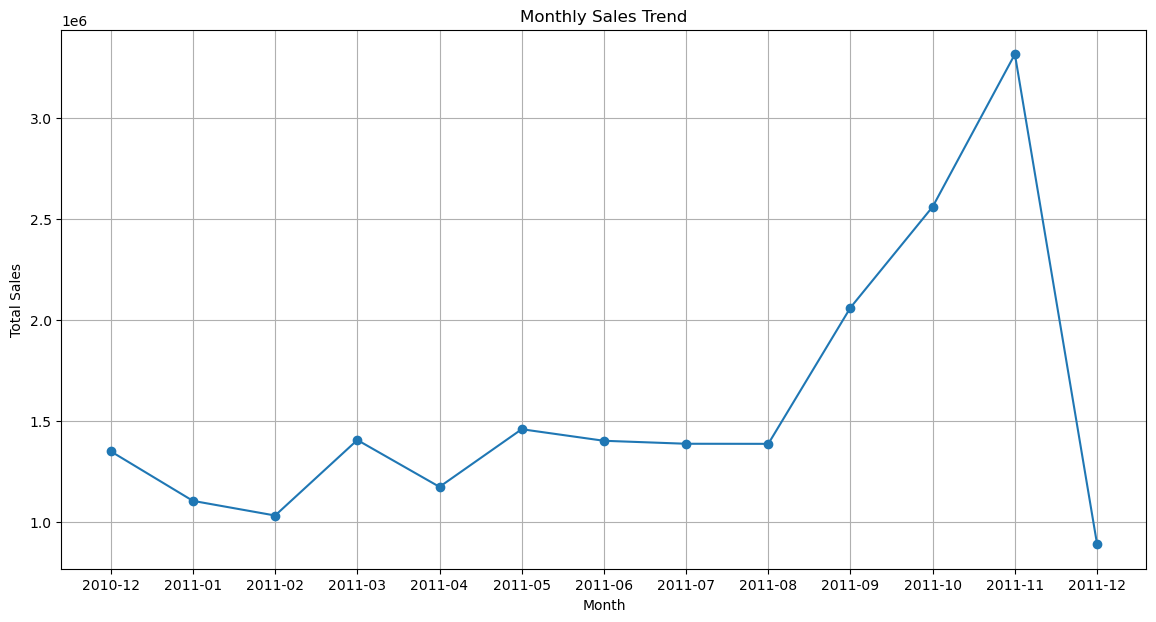

In [166]:
# Plot a line chart monthly sales trend
plt.figure(figsize=(14, 7))
plt.plot(monthly_sales.index.strftime('%Y-%m'), monthly_sales.values, marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trend')
plt.grid(True)

# Display the plot
plt.show()

**Observations**

- December 2010 to August 2011: Noticeable fluctuations in sales quantity.
- August 2011 to November 2011: A significant sales increase occurred.
- November 2011 to December 2011: Sales experienced a sudden and substantial decline.

## Analyze product sales

In [167]:
# Group by Description to find top products
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

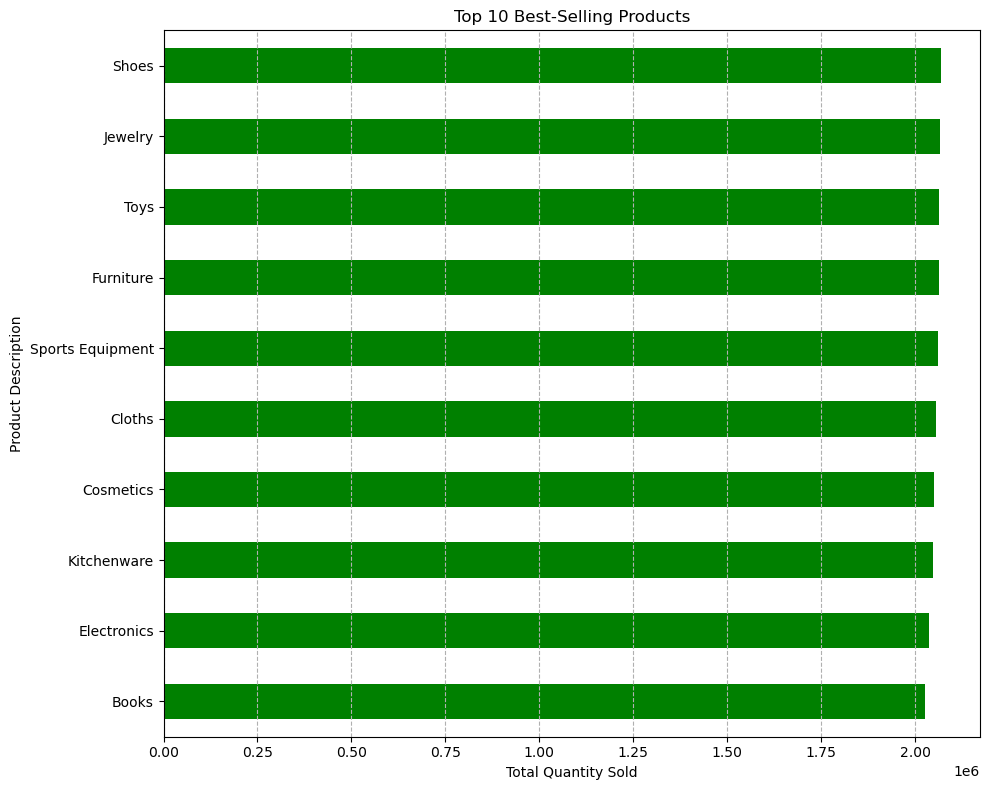

In [168]:
# Plot top products using a horizontal bar chart
plt.figure(figsize=(10, 8))  # Adjust figure size for better readability
top_products.plot(kind='barh', color='green')  # Use barh for horizontal bars
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Description')
plt.title('Top 10 Best-Selling Products')
plt.gca().invert_yaxis()  # Invert y-axis to show the top product at the top
plt.grid(axis='x', linestyle='--')  # Add grid lines for better readability
plt.tight_layout()  # Adjust layout to prevent labels from being cut off

# Display the plot
plt.show()

### Analyze customer purchase frequency

In [169]:
# Group by CustomerID to count purchases
customer_purchases = df.groupby('CustomerID')['InvoiceNo'].nunique()

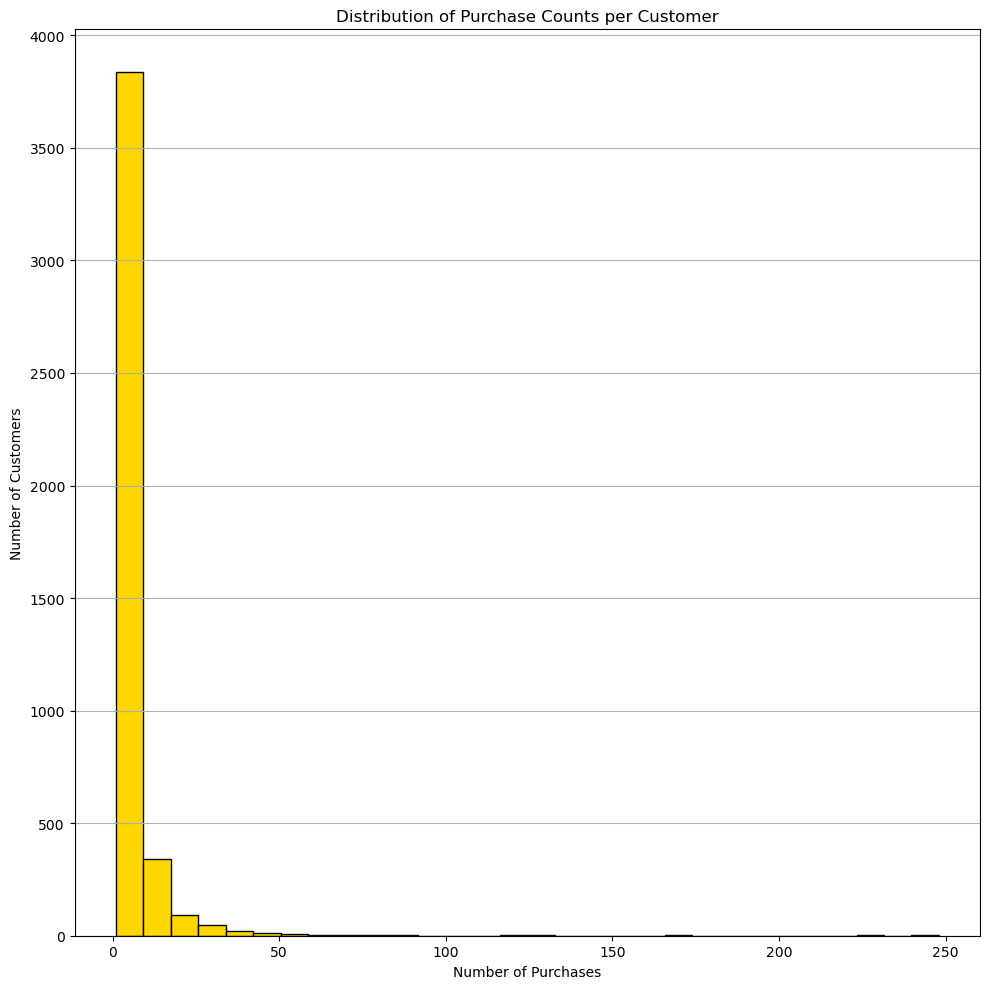

In [170]:
# Plot histogram of purchase counts to analyze purchase behaviour
plt.figure(figsize=(10, 10))
plt.hist(customer_purchases, bins=30, color='gold', edgecolor='black')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.title('Distribution of Purchase Counts per Customer')
plt.grid(axis='y')
plt.tight_layout()   # Customize the plot for better readability

# Show the plot
plt.show()

### Recency, Frequency, Monetary, (RFM) and Customer Tenure Features

In [171]:
snapshot_date = dt.datetime(2025, 4, 18)
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': [lambda x: (snapshot_date - x.max()).days,  # Recency
                    lambda x: (x.max() - x.min()).days],       # Tenure
    'InvoiceNo': 'nunique',                                    # Frequency
    'TotalPrice': 'sum'                                        # Monetary
})
rfm.columns = ['Recency', 'Frequency', 'Monetary', 'Tenure']
rfm = rfm.reset_index()
rfm.to_csv('Dataset_ecommerce.csv', index=False)

In [172]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary,Tenure
0,12346.0,5203,0,2,5342.40
1,12347.0,4880,365,7,431501.00
2,12348.0,4953,282,4,82378.47
3,12349.0,4896,0,1,176075.12
4,12350.0,5188,0,1,48173.37


# Cohort Analysis

## Create cohort month

Since we are carrying out a Time-based cohort analysis, the cohorts will be grouped according to the dates/month they made their first purchase and Retention rate will be calculated by analyzing the months they stayed active after their first purchase.

In [185]:
# Assign Cohort Month
df['CohortMonth'] = df.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('M')

In [186]:
# Transaction month
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')

In [187]:
# Calculate Cohort Index: months since cohort start
df['CohortIndex'] = (df['InvoiceMonth'] - df['CohortMonth']).apply(attrgetter('n')) + 1

In [188]:
# Create Cohort retention matrix
cohort_data = df.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].nunique().reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')

# Calculate Cohort Retention Rate
cohort_sizes = cohort_counts.iloc[:,0]
cohort_retention = cohort_counts.divide(cohort_sizes, axis=0)

In [189]:
df.head()


,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,TotalPrice,CohortMonth,InvoiceMonth,CohortIndex
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt,664.95,2010-12,2010-12,1
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali,1862.95,2010-12,2010-12,1
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali,4796.22,2010-12,2010-12,1
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa,370.95,2010-12,2010-12,1
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda,1941.50,2010-12,2010-12,1


In [193]:
cohort_retention

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
2011-01,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
2011-02,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
2011-03,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
2011-04,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
2011-05,1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,NaN,NaN,NaN
2011-06,1.0,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


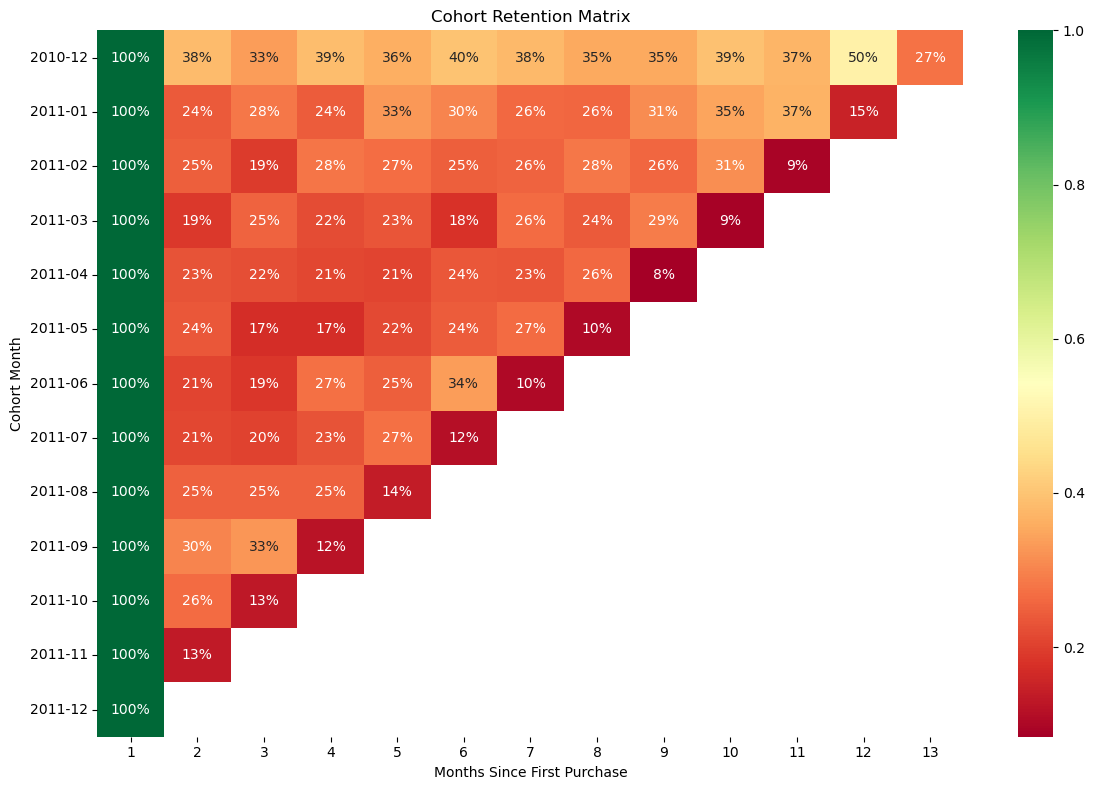

In [194]:
# Visualize the Cohort Retention Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cohort_retention, annot=True, fmt='.0%', cmap='RdYlGn')
plt.title('Cohort Retention Matrix')
plt.xlabel('Months Since First Purchase')
plt.ylabel('Cohort Month')
plt.tight_layout()

# Display the heatmap plot
plt.show()